The raw data of dwelling lifetime is not cleaned even though it also contain year 2051-2100.
The standard deviation for 1600-1799 is modelled with regression and merged into the data.
The same is done for average lifetime. The trend was linear for the raw data and therefore linear regression was chosen.

The linear relationship can be expressed with this function (from warm_up_15):

\begin{equation}
    \textbf{Y} = \beta \textbf{X}+ \epsilon
\end{equation}

To do the regression B must be found.

In [1]:
# All imports
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.stats import norm #for normal distribution
#import statsmodels.api as sm #for linear regression
import matplotlib.pyplot as plt
import math as ma

import os
from pathlib import Path
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [2]:
#* Define paths
directory_path = Path('../../../')

In [3]:
raw_data = pd.read_excel(
    directory_path / 'data' / 'raw_data' / 'Dwelling_Lifetime' / 'lifetime_raw_data_new.xlsx',
    header=0)

new_header = ['year', 'lifetime', 'sigma'] # Assigning new names to the header
raw_data.columns = new_header

# Remove the last 50 rows (years 2051-2100)
raw_data = raw_data.iloc[:-50]

# defining the parameters as np.arrays
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
sigma = np.array(raw_data.sigma)

# Display the DataFrame with updated column names
raw_data.tail()

,year,lifetime,sigma
246,2046,96,0.201818
247,2047,96,0.201818
248,2048,96,0.201818
249,2049,96,0.201818
250,2050,96,0.201818


In [4]:
#Calculate standard devision column by multiplying mean lifetime with sigma:
raw_data['std_dev'] = raw_data['lifetime'] * raw_data['sigma']
std_dev = raw_data['std_dev']

# Remove the 'sigma' column
raw_data = raw_data.drop('sigma', axis=1)

raw_data.head()

,year,lifetime,std_dev
0,1800,150,45.0
1,1801,150,45.0
2,1802,150,45.0
3,1803,150,45.0
4,1804,150,45.0


In [5]:
# Save the cleaned dataframe to a new Excel file
raw_data.to_excel(directory_path / 
                 'Data/cleaned_and_combined_data/Dwelling_Lifetime/Cleaned_Dwelling_Lifetime.xlsx')

In [6]:
'''#Plot of the raw data for standard deviation without regression
plt.figure(figsize=(16,10))
plt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')
plt.xlabel('Year')
plt.ylabel('Standard deviation')
plt.title('Raw data Standard deviation - visualization')
plt.legend(loc = 'best')
plt.show()'''

"#Plot of the raw data for standard deviation without regression\nplt.figure(figsize=(16,10))\nplt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')\nplt.xlabel('Year')\nplt.ylabel('Standard deviation')\nplt.title('Raw data Standard deviation - visualization')\nplt.legend(loc = 'best')\nplt.show()"

In [7]:
# defining the parameters as np.arrays (one more time)
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
std_dev = np.array(raw_data.std_dev)

Regression for standard deviation 1600-2050 (logistic):

In [8]:
#define logistic function and noise function
def logistic(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value

    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

The optimal choice of parameters for the logistic function, given the sample data, is [1936.67270988   24.75552725   45.11850422   18.95289571] (ti, tau, C0, C1).


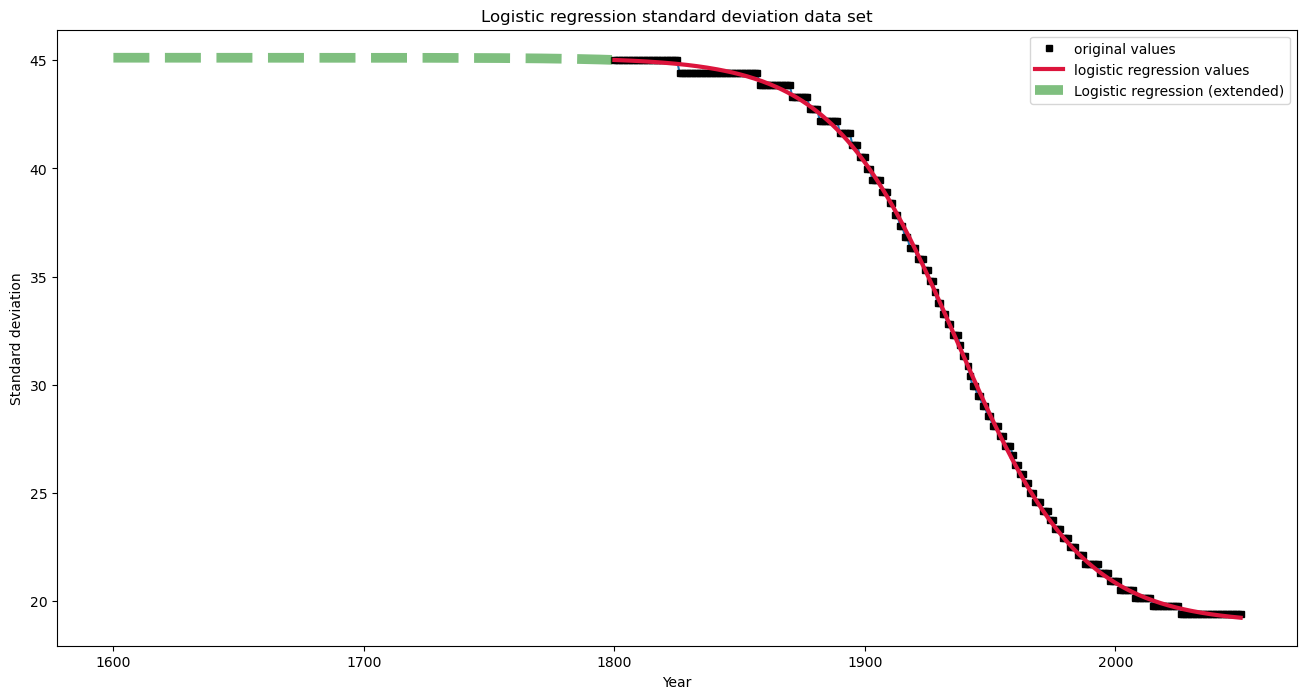

In [9]:
plt.figure(figsize=(16,8))

#add plot and labels here
plt.plot(year,std_dev)
plt.xlabel('Year')
plt.ylabel('Standard deviation')

#-------------------------------------------------------
#Logistic regression:
inputs = year
outputs = std_dev
std_dev_log = outputs
pred_inputs = year

# it might be necessary to adjust the bounds argument, 
# determining the extreme acceptable value for the parameters of the logistic function.
# Bounds are set as ([low_ti, low_tau, low_Co, low_C1],[high_ti,high_tau, high_Co, high_C1 ])
#popt, pcov = curve_fit(logistic, inputs, outputs, bounds = ([min(inputs), 0.4*10**6, 0.4*10**6, 0.4*10**6], [max(inputs), 1.5*10**6, 1.5*10**6, 1.5*10**6]))
popt, pcov = curve_fit(logistic, inputs, outputs, bounds = ([min(inputs), 0,0,0], [max(inputs),  10**6, 10**5, 10**6]))
pred_outputs_log_p = logistic(pred_inputs, *popt)

print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, C0, C1).')

plt.plot(year, std_dev_log, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs, pred_outputs_log_p, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')

#-------------------------------------------------------

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
log_reg_std_dev = logistic(reg_years, *popt)


# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, log_reg_std_dev, '--', lw=7, alpha=0.5, color='green', label='Logistic regression (extended)')
plt.legend(loc='best')

#--------------------------------------------------------

plt.title('Logistic regression standard deviation data set')
plt.show()

Lifetime:

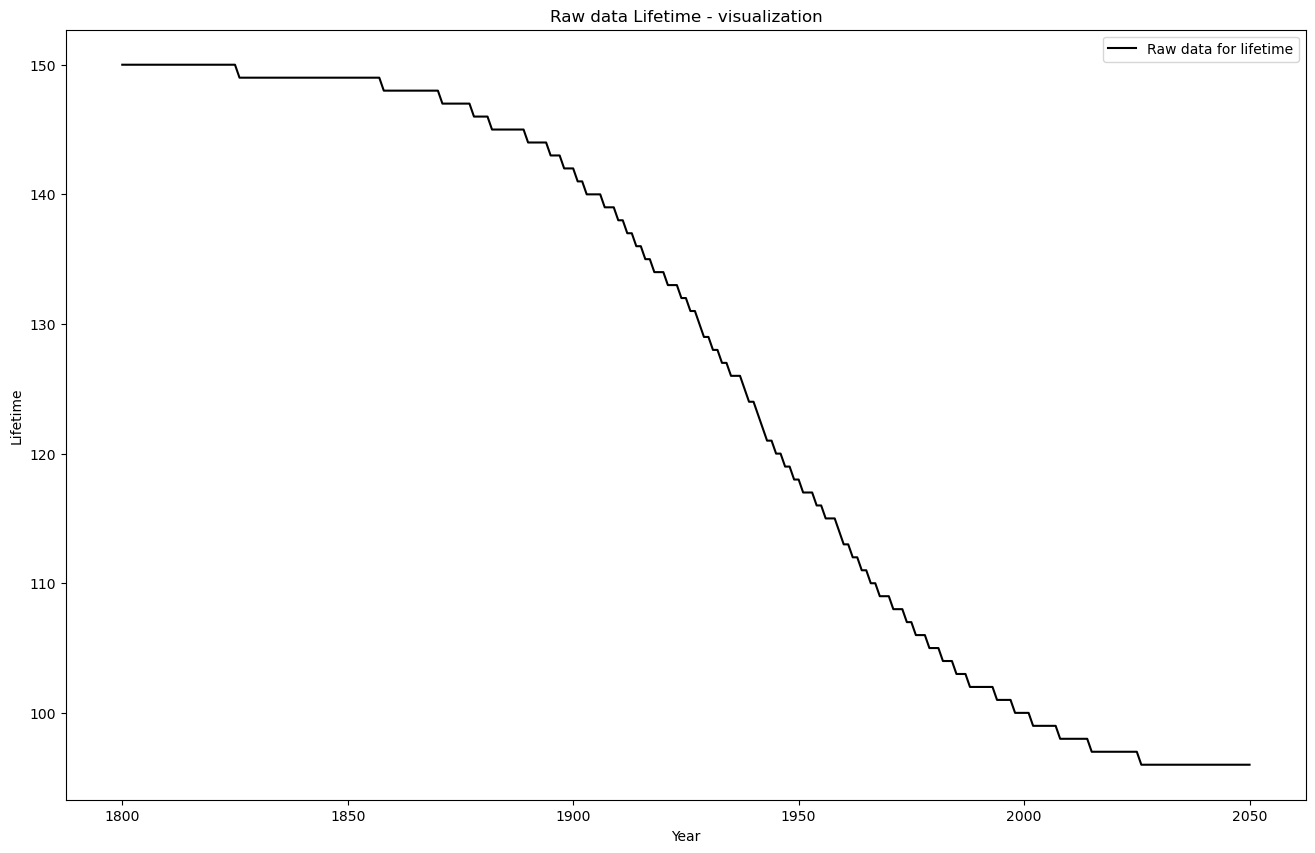

In [10]:
#Plot of the raw data for lifetime without regression
plt.figure(figsize=(16,10))
plt.plot(year, lifetime, color = 'black', markersize = 5, label = f'Raw data for lifetime')
plt.xlabel('Year')
plt.ylabel('Lifetime')
plt.title('Raw data Lifetime - visualization')
plt.legend(loc = 'best')
plt.show()

Regression for lifetime 1600-2050 (logistic):

The optimal choice of parameters for the logistic function, given the sample data, is [1942.02577141   25.12841854  150.25223455   94.79547987] (ti, tau, C0, C1).


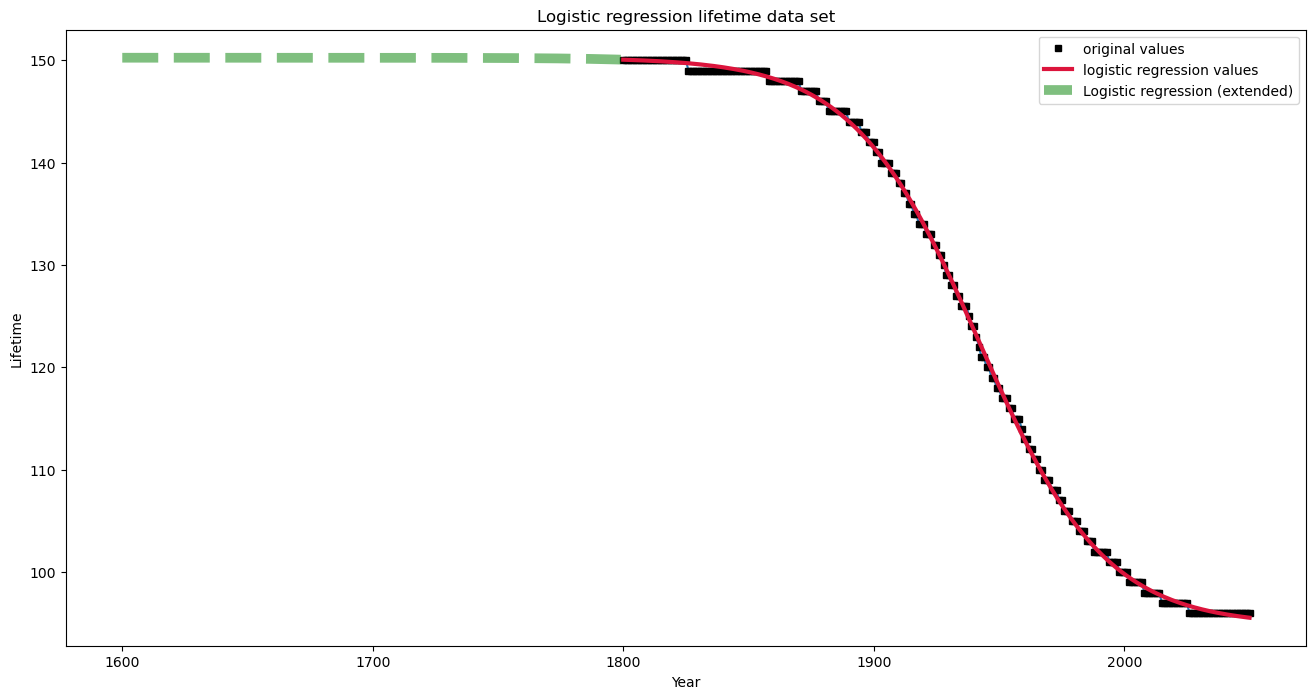

In [11]:
plt.figure(figsize=(16,8))

#add plot and labels here
plt.plot(year,lifetime)
plt.xlabel('Year')
plt.ylabel('Lifetime')

#-------------------------------------------------------
#Logistic regression:
inputs = year
outputs = lifetime
lifetime_log = outputs
pred_inputs = year

# it might be necessary to adjust the bounds argument, 
# determining the extreme acceptable value for the parameters of the logistic function.
# Bounds are set as ([low_ti, low_tau, low_Co, low_C1],[high_ti,high_tau, high_Co, high_C1 ])
#popt, pcov = curve_fit(logistic, inputs, outputs, bounds = ([min(inputs), 0.4*10**6, 0.4*10**6, 0.4*10**6], [max(inputs), 1.5*10**6, 1.5*10**6, 1.5*10**6]))
popt, pcov = curve_fit(logistic, inputs, outputs, bounds = ([min(inputs), 0,0,0], [max(inputs),  10**6, 10**5, 10**6]))
pred_outputs_log_p = logistic(pred_inputs, *popt)

print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, C0, C1).')

plt.plot(year, lifetime_log, 's', color = 'black', markersize = 5, label = f'original values')
plt.plot(pred_inputs, pred_outputs_log_p, color = 'crimson', lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')

#-------------------------------------------------------

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
log_reg_lifetime = logistic(reg_years, *popt)


# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, log_reg_lifetime, '--', lw=7, alpha=0.5, color='green', label='Logistic regression (extended)')
plt.legend(loc='best')

#--------------------------------------------------------

plt.title('Logistic regression lifetime data set')
plt.show()

Save and combine the new values with the raw data in a new dataframe:

In [12]:
# Create a combined DataFrame for all values
extended_data = pd.DataFrame({
    'year': reg_years,
    'lifetime': log_reg_lifetime,
    'std_dev': log_reg_std_dev
})

# Concatenate the original DataFrame with the extended DataFrame
combined_data = pd.concat([extended_data, raw_data])

combined_data = combined_data.set_index('year')

# Display the combined_data DataFrame
#print(extended_data)
print(combined_data)

        lifetime    std_dev
year                       
1600  150.252167  45.118472
1601  150.252164  45.118470
1602  150.252161  45.118469
1603  150.252158  45.118468
1604  150.252155  45.118466
...          ...        ...
2046   96.000000  19.374545
2047   96.000000  19.374545
2048   96.000000  19.374545
2049   96.000000  19.374545
2050   96.000000  19.374545

[451 rows x 2 columns]


In [13]:
# Save the merged dataframe to a new Excel file
combined_data.to_excel(directory_path / 
                 'Data/regression_data/Dwelling_Lifetime/regression_Dwelling_Lifetime_log.xlsx')

#excel_filename = 'regression_Dwelling_Lifetime.xlsx'
#combined_data.to_excel(excel_filename, index=False)